1) Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
df = pd.read_csv("http://www.scipy-lectures.org/_downloads/populations.txt", delimiter = "\t")

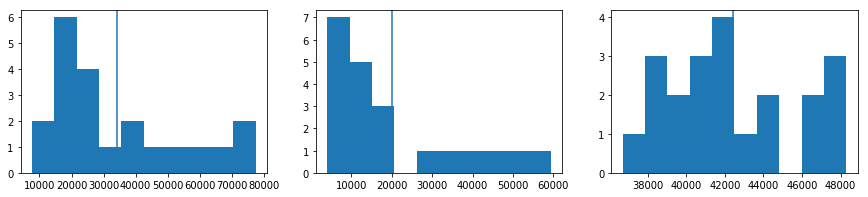

Mean: 
[34080.95238095 20166.66666667 42400.        ]
Std: 
[20897.90645809 16254.59153691  3322.50622558]


In [81]:
arr = df.values

fig, axs = plt.subplots(1, 3, figsize=(15, 3))
axs[0].hist(arr[:,1],bins = 10)
axs[0].axvline(arr[:,1].mean())
axs[1].hist(arr[:,2],bins = 10)
axs[1].axvline(arr[:,2].mean())
axs[2].hist(arr[:,3],bins = 10)
axs[2].axvline(arr[:,3].mean())
plt.show()

mean = np.mean(arr[:, 1:4], axis = 0)
std = np.std(arr[:, 1:4], axis = 0)
print("Mean: ")
print(mean)
print("Std: ")
print(std)

2) Find which year each species had the largest population. Mark these years in the plot of populations.

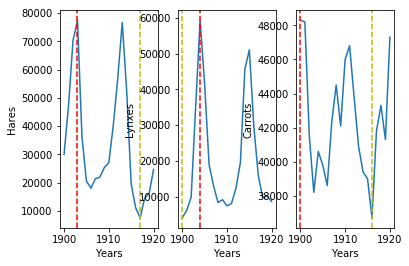

In [78]:
maxima = arr[arr.argmax(axis = 0), 0]
minima = arr[arr.argmin(axis = 0), 0]

plt.subplot(1, 3, 1)
plt.plot(arr[:, 0], arr[:, 1])
plt.ylabel('Hares')
plt.xlabel('Years')
plt.axvline(x=maxima[1], color='r', linestyle='dashed')
plt.axvline(x=minima[1], color='y', linestyle='dashed')

plt.subplot(1, 3, 2)
plt.plot(arr[:, 0], arr[:, 2])
plt.xlabel('Years')
plt.ylabel('Lynxes')
plt.axvline(x=maxima[2], color='r', linestyle='dashed')
plt.axvline(x=minima[2], color='y', linestyle='dashed')

plt.subplot(1, 3, 3)
plt.plot(arr[:, 0], arr[:, 3])
plt.xlabel('Years')
plt.ylabel('Carrots')
plt.axvline(x=maxima[3], color='r', linestyle='dashed')
plt.axvline(x=minima[3], color='y', linestyle='dashed')

plt.show()

3) Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

In [64]:
difference = arr[:, 1] - arr[:, 2]
mask = difference < 0
array = np.empty(21, dtype = np.str)
array[:] = "H"
array[mask] = 'L'
print(array)

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


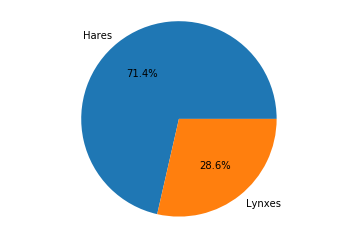

In [66]:
labels = 'Hares', 'Lynxes'
sizes = [ np.sum(np.ones(21)[array=='H']), np.sum(np.ones(21)[array=='L']) ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

4) Find which years any of the populations is above 50000. Show time periods where populations are above 50000 in the plot of populations.

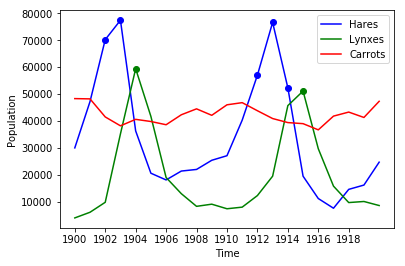

In [72]:
mask1=arr[:,1]>50000
mask2=arr[:,2]>50000
mask3=arr[:,3]>50000
plt.plot(arr[:,0][mask1],arr[:,1][mask1],'go',color='blue')
plt.plot(arr[:,0][mask2],arr[:,2][mask2],'go',color='green')
plt.plot(arr[:,0][mask3],arr[:,3][mask3],'go',color='red')
plt.plot(arr[:,0],arr[:,1],label="Hares", color='blue')
plt.plot(arr[:,0],arr[:,2],label="Lynxes",color='green')
plt.plot(arr[:,0],arr[:,3],label="Carrots",color='red')
plt.xticks(np.arange(arr[:,0].min(),arr[:,0].max(),2))
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.show()

5) Find the top 2 years for each species when they had the lowest populations.

In [75]:
minpop = np.transpose(np.argsort(arr[:,1:], axis = 0)[:2])
print(arr[minpop,0])

[[1917. 1916.]
 [1900. 1901.]
 [1916. 1903.]]


Plot the change in hare population and the number of lynxes. Find the correlation coeffitient.

[ 17200.  23000.   7200. -41100. -15700.  -2500.   3300.    600.   3400.
   1700.  13200.  16700.  19600. -24300. -32800.  -8300.  -3600.   7000.
   1600.   8500.]
-265.0
Correlation coeffitient =  -0.8494801603656876


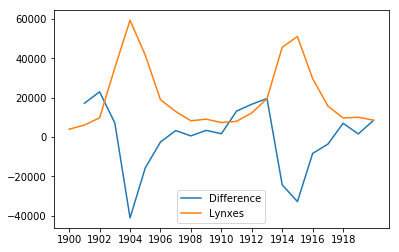

In [116]:
hares1 = np.delete(arr[:, 1], -1)
hares2 = np.delete(arr[:, 1], 0)

difference = hares2 - hares1
newtime = np.delete(arr[:,0], 0)

plt.plot(newtime, difference,label="Difference")
plt.plot(arr[:,0], arr[:,2], label = "Lynxes")
plt.xticks(np.arange(arr[:,0].min(),arr[:,0].max(),2))
print("Correlation coeffitient = ", np.corrcoef(difference, np.delete(arr[:,2],0))[0,1])
plt.legend()
plt.show()

6) Show population of hares vs carrots and hares vs lynxes.

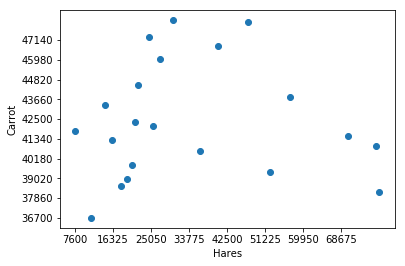

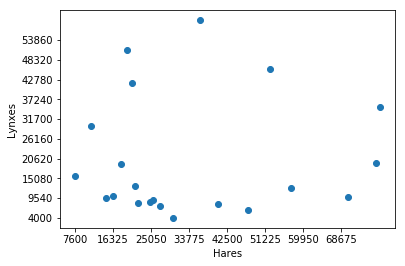

In [112]:
plt.scatter(arr[:,1],arr[:,3])
plt.xlabel("Hares")
plt.ylabel("Carrot")
plt.xticks(np.arange(arr[:,1].min(),arr[:,1].max(),(arr[:,1].max()-arr[:,1].min())/8))
plt.yticks(np.arange(arr[:,3].min(),arr[:,3].max(),(arr[:,3].max()-arr[:,3].min())/10))
plt.show()
plt.scatter(arr[:,1],arr[:,2])
plt.xlabel("Hares")
plt.ylabel("Lynxes")
plt.xticks(np.arange(arr[:,1].min(),arr[:,1].max(),(arr[:,1].max()-arr[:,1].min())/8))
plt.yticks(np.arange(arr[:,2].min(),arr[:,2].max(),(arr[:,2].max()-arr[:,2].min())/10))
plt.show()

7) Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

In [118]:
a = arr[0:19,1].mean()
print(abs(a-arr[20,1])/arr[20,1])

0.4378862135094823
